## Coursera Capstone Project
### IBM Applied Data Science Capstone

## Exploring Toronto neighborhoods to open an new hotel

Main objectives of this project to define a business problem, look for data in the web and, use Foursquare location data to compare different neighborhoods in Toronto to figure out which neighborhood is suitable for starting a new Hotel.

### 1. Introduction

#### a. Background

This report is for those who are planning to start a new hotel in the city of Toronto. It provides a suggestion on what would be the best venue to start a new hotel in a highly visited city with already many good hotels. Toronto, capital of the province of Ontario, is one of the major Canadian cities, located on the northwest shore of Lake Ontario. This dynamic metropolis includes a number of dizzying skyscrapers, dominated by the iconic CN tower. Toronto is also home to many green spaces, from Queens Park Oval Park to High Park, which covers an area of 1.6 km2 and offers trails, sports facilities and a zoo. is definitely one of the best places to start up a new hotel business.Toronto is one of Canada's leading tourism destinations. In 2017, the Toronto-area received 43.7 million tourists, of which 10.4 million were domestic visitors and 2.97 million were from the United States, spending a total of $8.84 billion. Toronto has an array of tourist attractions, and a rich cultural life.

#### b. Business Problem

This report focusses on the issue of where to open a new hotel in a city like Toronto, once one has decided to go ahead. 
In this project we will go through step by step process to make a decision whether it is a good idea to open a new Hotel in Toronto. We analyze the neighborhoods in Toronto to identify the most profitable area since the success of the Hotel depends on the people and ambience, the rate of the most common crimes by district, tourist and place. we just need to make sure whether it is a profitable idea or not. If so, where we can place it, so it yields more profit to the owner.

### Expected / Interested Audience

* On what basis can Momentum decide its new hotel's location?
* While selecting the place there are key points to consider like they need to check out like where the most well-visited       venues of the city are?
* If incase there are already other luxury hotels which have good ratings, will it be risky to open new one near these hotels?


* Business personnel who wants to invest or open a new hotel. This analysis will be a comprehensive guide to start or expand an Hotel targetting tourist.
* Investor who wants to invest in the creation of a new Hotel. This analysis will give an idea, how beneficial it is to open an Hotel and what are the strength and weakness of this business.
* Travelers crowd who want to find neighborhoods with lots of option for the best Hotel.

### 2. Data

#### 2.1. Data collections and description

To resolve this problem we are going to use :
    
1) I’m using “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.

2) Then I’m using “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods.

3) To get location and other information about various venues in Toronto I’m using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations), I’m fetching details about the venues up present in Toronto and collected their names, categories and locations (latitude and longitude).

4) https://data.torontopolice.on.ca/datasets/mci-2014-to-2019 It includes all Major Crime Indicators (MCI) 2014 to 2019 occurrences by reported date and related offences to predict crime on Toronto Neighbourhoods such as:
     * Occurrence years
     * Occurrence months
     * Occurrence days
     * Occurrence days of year
     * Occurrence days of week
     * Occurrence hours
     * Major Crime Indicators (MCI)
     * Neighbourhood.

In [3]:
import warnings
warnings.filterwarnings('ignore') 
#import requests # HTTP library
import requests
import pandas as pd # for data analysis
import numpy as np  # data in a vectorized manner manipulation
# Matplotlib and associated plotting modules for visualization
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

import statsmodels.api as sm # implement statistic tests
import time # use time
from geopy.geocoders import Nominatim  # for geocoders referencing
import geopandas as gpd # for spatial dataset
import seaborn as sns # for plotting and visulalization
from scipy import stats # statistic computation
from bs4 import BeautifulSoup # scrapping web site
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re # regular expression
import folium
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from  sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
# import k-means from clustering stage
from sklearn.cluster import KMeans
sns.set_style("white")

In [4]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
X                      167525 non-null float64
Y                      167525 non-null float64
Index_                 167525 non-null int64
event_unique_id        167525 non-null object
occurrencedate         167525 non-null object
reporteddate           167525 non-null object
premisetype            167525 non-null object
ucr_code               167525 non-null int64
ucr_ext                167525 non-null int64
offence                167525 non-null object
reportedyear           167525 non-null int64
reportedmonth          167525 non-null object
reportedday            167525 non-null int64
reporteddayofyear      167525 non-null int64
reporteddayofweek      167525 non-null object
reportedhour           167525 non-null int64
occurrenceyear         167476 non-null float64
occurrencemonth        167476 non-null object
occurrenceday          167476 non-null float64
occurrencedayofyea

In [5]:

# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
display(data_geom.head())
# 2. selects columns needed to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry','FIELD_7']]
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code','FIELD_7':'city_district'},inplace =True)
data_geometry_final = data_geom
display(data_geometry_final.info())
display(data_geometry_final.head())

FIELD_1   FIELD_2   FIELD_3  FIELD_4  FIELD_5  FIELD_6  \
0      141  25886861  25926662    49885       94       94   
1      142  25886820  25926663    49885      100      100   
2      143  25886834  25926664    49885       97       97   
3      144  25886593  25926665    49885       27       27   
4      145  25886688  25926666    49885       31       31   

                        FIELD_7                       FIELD_8 FIELD_9  \
0                 Wychwood (94)                 Wychwood (94)    None   
1          Yonge-Eglinton (100)          Yonge-Eglinton (100)    None   
2           Yonge-St.Clair (97)           Yonge-St.Clair (97)    None   
3  York University Heights (27)  York University Heights (27)    None   
4       Yorkdale-Glen Park (31)       Yorkdale-Glen Park (31)    None   

  FIELD_10   FIELD_11   FIELD_12  FIELD_13      FIELD_14      FIELD_15  \
0     None -79.425515  43.676919  16491505  3.217960e+06   7515.779658   
1     None -79.403590  43.704689  16491521  3.160334e+06   7872.021074   
2     None -79.397871  43.687859  16491537  2.222464e+06   8130.411276   
3     None -79.488883  43.765736  16491553  2.541821e+07  25632.335242   
4     None -79.457108  43.714672  16491569  1.156669e+07  13953.408098   

                                            geometry  
0  POLYGON ((309967.120 4837586.769, 310047.783 4...  
1  POLYGON ((311976.621 4840247.041, 312084.257 4...  
2  POLYGON ((313572.832 4837693.591, 313555.868 4...  
3  POLYGON ((304374.200 4846441.252, 304406.841 4...  
4  POLYGON ((309660.957 4840414.596, 309626.870 4...

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
district_code    140 non-null int64
x                140 non-null float64
y                140 non-null float64
geometry         140 non-null geometry
city_district    140 non-null object
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 5.6+ KB


None

district_code          x          y  \
0             94 -79.425515  43.676919   
1            100 -79.403590  43.704689   
2             97 -79.397871  43.687859   
3             27 -79.488883  43.765736   
4             31 -79.457108  43.714672   

                                            geometry  \
0  POLYGON ((309967.120 4837586.769, 310047.783 4...   
1  POLYGON ((311976.621 4840247.041, 312084.257 4...   
2  POLYGON ((313572.832 4837693.591, 313555.868 4...   
3  POLYGON ((304374.200 4846441.252, 304406.841 4...   
4  POLYGON ((309660.957 4840414.596, 309626.870 4...   

                  city_district  
0                 Wychwood (94)  
1          Yonge-Eglinton (100)  
2           Yonge-St.Clair (97)  
3  York University Heights (27)  
4       Yorkdale-Glen Park (31)

In [6]:
# @hidden_cell

CLIENT_ID = 'BUXXBESR0MVYEFMZ0NP5GIBE2Y5V4FQ2YEDYP4IP5A4IYSS1' # your Foursquare ID
CLIENT_SECRET = 'HNBMTAGJ4JAKNMSDEX03OZCFZMT3JJAKOPRG2LR1W1YD5MX2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [7]:
toronto_latitude = data_geometry_final.loc[30, 'y'] # neighborhood latitude value
toronto_longitude = data_geometry_final.loc[30, 'x'] # neighborhood longitude value

toronto_name = data_geometry_final.loc[0, 'city_district'] # nteighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(toronto_name, 
                                                               toronto_latitude, 
                                                               toronto_longitude))

Latitude and longitude values of Wychwood (94) are 43.6974081338, -79.2797083433.


In [8]:
# @hidden_cell
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 20000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude,
    toronto_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=BUXXBESR0MVYEFMZ0NP5GIBE2Y5V4FQ2YEDYP4IP5A4IYSS1&client_secret=HNBMTAGJ4JAKNMSDEX03OZCFZMT3JJAKOPRG2LR1W1YD5MX2&v=20180605&ll=43.6974081338,-79.2797083433&radius=20000&limit=100'

In [9]:
# function that defines the most common revenues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f121a05a536c57dc66f91cf'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 235,
  'suggestedBounds': {'ne': {'lat': 43.87740831380018,
    'lng': -79.03120973046795},
   'sw': {'lat': 43.517407953799825, 'lng': -79.52820695613205}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5286b7dd498e8b747c1dfe71',
       'name': 'The Beech Tree',
       'location': {'address': '924 Kingston Rd.',
        'lat': 43.680493,
        'lng': -79.288846,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.680493,
          'lng': -79.288846}]

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
# convert venues to dataset
toronto_venues = getNearbyVenues(names=data_geometry_final['city_district'],
                                   latitudes=data_geometry_final['y'],
                                   longitudes=data_geometry_final['x']
                                  )

Wychwood (94)
Yonge-Eglinton (100)
Yonge-St.Clair (97)
York University Heights (27)
Yorkdale-Glen Park (31)
Lambton Baby Point (114)
Lansing-Westgate (38)
Lawrence Park North (105)
Lawrence Park South (103)
Leaside-Bennington (56)
Little Portugal (84)
Long Branch (19)
Malvern (132)
Maple Leaf (29)
Markland Wood (12)
Milliken (130)
Mimico (includes Humber Bay Shores) (17)
Morningside (135)
Moss Park (73)
Mount Dennis (115)
Mount Olive-Silverstone-Jamestown (2)
Mount Pleasant East (99)
Mount Pleasant West (104)
New Toronto (18)
Newtonbrook East (50)
Newtonbrook West (36)
Niagara (82)
North Riverdale (68)
North St.James Town (74)
O'Connor-Parkview (54)
Oakridge (121)
Oakwood Village (107)
Old East York (58)
Palmerston-Little Italy (80)
Parkwoods-Donalda (45)
Pelmo Park-Humberlea (23)
Playter Estates-Danforth (67)
Pleasant View (46)
Princess-Rosethorn (10)
Regent Park (72)
Rexdale-Kipling (4)
Rockcliffe-Smythe (111)
Roncesvalles (86)
Rosedale-Moore Park (98)
Rouge (131)
Runnymede-Bloor Wes

In [45]:
toronto_venues['Neighborhood'] = toronto_venues['Neighborhood'].apply(lambda x:  x.split("(")[0])

In [46]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                  
Agincourt North                                          18   
Agincourt South-Malvern West                             20   
Alderwood                                                 5   
Annex                                                    27   
Banbury-Don Mills                                        23   
Bathurst Manor                                            4   
Bay Street Corridor                                      71   
Bayview Village                                           3   
Bayview Woods-Steeles                                     2   
Bedford Park-Nortown                                     29   
Beechborough-Greenbrook                                   3   
Bendale                                                   4   
Birchcliffe-Cliffside                                     4   
Black Creek                                               5   
Blake-Jones                                              16   
Briar Hill-Belgravia                                     11   
Bridle Path-Sunnybrook-York Mills                         9   
Broadview North                                           3   
Brookhaven-Amesbury                                       1   
Cabbagetown-South St.James Town                          46   
Caledonia-Fairbank                                        2   
Casa Loma                                                12   
Centennial Scarborough                                    4   
Church-Yonge Corridor                                   100   
Clairlea-Birchmount                                      10   
Clanton Park                                              4   
Cliffcrest                                                6   
Corso Italia-Davenport                                   22   
Danforth                                                 31   
Danforth East York                                        6   
Don Valley Village                                        8   
Dorset Park                                               7   
Dovercourt-Wallace Emerson-Junction                      13   
Downsview-Roding-CFB                                      3   
Dufferin Grove                                           60   
East End-Danforth                                        16   
Edenbridge-Humber Valley                                  4   
Eglinton East                                             5   
Elms-Old Rexdale                                          5   
Englemount-Lawrence                                       7   
Eringate-Centennial-West Deane                            6   
Etobicoke West Mall                                       4   
Flemingdon Park                                          13   
Forest Hill North                                        21   
Forest Hill South                                         2   
Glenfield-Jane Heights                                    5   
Greenwood-Coxwell                                        41   
Guildwood                                                 5   
Henry Farm                                                5   
High Park North                                          11   
High Park-Swansea                                        13   
Highland Creek                                            5   
Hillcrest Village                                         2   
Humber Heights-Westmount                                  3   
Humber Summit                                             1   
Humbermede                                                3   
Humewood-Cedarvale                                        5   
Ionview                                                   6   
Islington-City Centre West                               14   
Junction Area                                            59   
Keelesdale-Eglinton West                                  8   
Kennedy Park                                              4   
Kensin

In [47]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 286 uniques categories.


In [48]:

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
cols=list(toronto_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
toronto_onehot=toronto_onehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
toronto_onehot.rename(columns = {'Neighborhood': 'Neighbourhood'}, inplace = True)
toronto_onehot.head()

Neighbourhood  African Restaurant  American Restaurant  Amphitheater  \
0        Wychwood                    0                    0             0   
1        Wychwood                    0                    0             0   
2        Wychwood                    0                    0             0   
3        Wychwood                    0                    0             0   
4  Yonge-Eglinton                    0                    0             0   

   Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  Art Gallery  \
0               0             0       0                       0            0   
1               0             0       0                       0            0   
2               0             0       0                       0            0   
3               0             0       0                       0            1   
4               0             0       0                       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Dealership  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0                0                0          0           0       0     0    0   
1                0                0          0           0       0     0    0   
2                0                0          0           0       0     0    0   
3                0                0          0           0       0     0    0   
4                0                0          0           0       0     0    0   

   Baseball Field  Beach  Beer Bar  Beer Store  Belgian Restaurant  \
0               0      0         0           0                   0   
1               0      0         0           0                   0   
2               0      0         0           0                   0   
3               0      0         0           0                   0   
4               0      0         0           0                   0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0                         0          0       0              0          0   
1                         0          0       0              0          0   
2                         0          0       0              0          0   
3                         0          0       0              0          0   
4                         0          0       0              0          0   

   Botanical Garden  Boutique  Bowling Alley  Brazilian Restaurant  \
0                 0         0              0                     0   
1                 0         0              0                     0   
2                 0         0              0                     0   
3                 0         0              0                     0   
4                 0         0              0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0               0        0            0                0       0         0   
1               0        0            0                0       0         0   
2               0        0            0                0       0         0   
3               0        0            0                0       0         0   
4               0        0            0                0       0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0             0              0         0            0         0   
1             0              0         0            0         0   
2             0              0         0            0         0   
3             0              0         0            0         0   
4             

In [49]:
toronto_onehot.shape

(2028, 286)

In [50]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  African Restaurant  \
0                        Agincourt North             0.000000   
1           Agincourt South-Malvern West             0.000000   
2                              Alderwood             0.000000   
3                                  Annex             0.000000   
4                      Banbury-Don Mills             0.000000   
5                         Bathurst Manor             0.000000   
6                    Bay Street Corridor             0.000000   
7                        Bayview Village             0.000000   
8                  Bayview Woods-Steeles             0.000000   
9                   Bedford Park-Nortown             0.000000   
10               Beechborough-Greenbrook             0.000000   
11                               Bendale             0.000000   
12                 Birchcliffe-Cliffside             0.000000   
13                           Black Creek             0.000000   
14                           Blake-Jones             0.000000   
15                  Briar Hill-Belgravia             0.000000   
16     Bridle Path-Sunnybrook-York Mills             0.000000   
17                       Broadview North             0.000000   
18                   Brookhaven-Amesbury             0.000000   
19       Cabbagetown-South St.James Town             0.000000   
20                    Caledonia-Fairbank             0.000000   
21                             Casa Loma             0.000000   
22                Centennial Scarborough             0.000000   
23                 Church-Yonge Corridor             0.000000   
24                   Clairlea-Birchmount             0.000000   
25                          Clanton Park             0.000000   
26                            Cliffcrest             0.000000   
27                Corso Italia-Davenport             0.000000   
28                              Danforth             0.000000   
29                    Danforth East York             0.000000   
30                    Don Valley Village             0.000000   
31                           Dorset Park             0.000000   
32   Dovercourt-Wallace Emerson-Junction             0.000000   
33                  Downsview-Roding-CFB             0.000000   
34                        Dufferin Grove             0.000000   
35                     East End-Danforth             0.000000   
36              Edenbridge-Humber Valley             0.000000   
37                         Eglinton East             0.000000   
38                      Elms-Old Rexdale             0.400000   
39                   Englemount-Lawrence             0.000000   
40        Eringate-Centennial-West Deane             0.000000   
41                   Etobicoke West Mall             0.000000   
42                       Flemingdon Park             0.000000   
43                     Forest Hill North             0.000000   
44                     Forest Hill South             0.000000   
45                Glenfield-Jane Heights             0.000000   
46                     Greenwood-Coxwell             0.000000   
47                             Guildwood             0.000000   
48                            Henry Farm             0.000000   
49                       High Park North             0.000000   
50                     High Park-Swansea             0.000000   
51                        Highland Creek             0.000000   
52                     Hillcrest Village             0.000000   
53              Humber Heights-Westmount             0.000000   
54                         Humber Summit             0.000000   
55                            Humbermede             0.000000   
56                    Humewood-Cedarvale             0.000000   
57                               Ionview             0.000000   
58            Islington-City Centre West             0.000000   
59                         Junction Area             0.000000   
60              Keelesdale-Eglinton West             0.000000  

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighbourhood  \
0                        Agincourt North    
1           Agincourt South-Malvern West    
2                              Alderwood    
3                                  Annex    
4                      Banbury-Don Mills    
5                         Bathurst Manor    
6                    Bay Street Corridor    
7                        Bayview Village    
8                  Bayview Woods-Steeles    
9                   Bedford Park-Nortown    
10               Beechborough-Greenbrook    
11                               Bendale    
12                 Birchcliffe-Cliffside    
13                           Black Creek    
14                           Blake-Jones    
15                  Briar Hill-Belgravia    
16     Bridle Path-Sunnybrook-York Mills    
17                       Broadview North    
18                   Brookhaven-Amesbury    
19       Cabbagetown-South St.James Town    
20                    Caledonia-Fairbank    
21                             Casa Loma    
22                Centennial Scarborough    
23                 Church-Yonge Corridor    
24                   Clairlea-Birchmount    
25                          Clanton Park    
26                            Cliffcrest    
27                Corso Italia-Davenport    
28                              Danforth    
29                    Danforth East York    
30                    Don Valley Village    
31                           Dorset Park    
32   Dovercourt-Wallace Emerson-Junction    
33                  Downsview-Roding-CFB    
34                        Dufferin Grove    
35                     East End-Danforth    
36              Edenbridge-Humber Valley    
37                         Eglinton East    
38                      Elms-Old Rexdale    
39                   Englemount-Lawrence    
40        Eringate-Centennial-West Deane    
41                   Etobicoke West Mall    
42                       Flemingdon Park    
43                     Forest Hill North    
44                     Forest Hill South    
45                Glenfield-Jane Heights    
46                     Greenwood-Coxwell    
47                             Guildwood    
48                            Henry Farm    
49                       High Park North    
50                     High Park-Swansea    
51                        Highland Creek    
52                     Hillcrest Village    
53              Humber Heights-Westmount    
54                         Humber Summit    
55                            Humbermede    
56                    Humewood-Cedarvale    
57                               Ionview    
58            Islington-City Centre West    
59                         Junction Area    
60              Keelesdale-Eglinton West    
61                          Kennedy Park    
62                  Kensington-Chinatown    
63         Kingsview Village-The Westway    
64                        Kingsway South    
65                            L'Amoreaux    
66                    Lambton Baby Point    
67                      Lansing-Westgate    
68                   Lawrence Park North    
69                   Lawrence Park South    
70                    Leaside-Bennington    
71                       Little Portugal    
72                           Long Branch    
73                               Malvern    
74                            Maple Leaf    
75                         Markland Wood    
76                              Milliken    
77                                Mimico    
78                           Morningside    
79                             Moss Park    
80                          Mount Dennis    
81     Mount Olive-Silverstone-Jamestown    
82                   Mount Pleasant East    
83                   Mount Pleasant West    
84                           New Toronto    
85                      Newtonbrook East    
86                               Niagara    
87                       North Riverdale    
88                   No

In [53]:
neighborhoods_venues_sorted.reset_index().head(5)

index                  Neighbourhood 1st Most Common Venue  \
0      0               Agincourt North     Chinese Restaurant   
1      1  Agincourt South-Malvern West     Chinese Restaurant   
2      2                     Alderwood            Pizza Place   
3      3                         Annex                   Café   
4      4             Banbury-Don Mills         Clothing Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Convenience Store   Japanese Restaurant              Pharmacy   
1         Shopping Mall           Pizza Place                  Café   
2     Convenience Store           Coffee Shop              Pharmacy   
3        Sandwich Place                   Pub           Coffee Shop   
4           Pizza Place            Shoe Store          Gourmet Shop   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Park        Discount Store        Clothing Store   
1  Cantonese Restaurant                  Bank            Restaurant   
2     Elementary School  Ethiopian Restaurant           Event Space   
3          Burger Joint           Social Club         Metro Station   
4              Pharmacy    Italian Restaurant        Medical Center   

  8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place       Fast Food Restaurant    Fried Chicken Joint  
1    Seafood Restaurant               Noodle House       Asian Restaurant  
2    Falafel Restaurant                       Farm         Farmers Market  
3           Shoe Repair  Middle Eastern Restaurant             Donut Shop  
4   Sporting Goods Shop            Bubble Tea Shop          Shopping Mall

### mci_2014_2018 Data cleaning

In [54]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
X                      167525 non-null float64
Y                      167525 non-null float64
Index_                 167525 non-null int64
event_unique_id        167525 non-null object
occurrencedate         167525 non-null object
reporteddate           167525 non-null object
premisetype            167525 non-null object
ucr_code               167525 non-null int64
ucr_ext                167525 non-null int64
offence                167525 non-null object
reportedyear           167525 non-null int64
reportedmonth          167525 non-null object
reportedday            167525 non-null int64
reporteddayofyear      167525 non-null int64
reporteddayofweek      167525 non-null object
reportedhour           167525 non-null int64
occurrenceyear         167476 non-null float64
occurrencemonth        167476 non-null object
occurrenceday          167476 non-null float64
occurrencedayofyea

In [55]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
print(mci_2014_2018.shape)
mci_2014_2018['Neighbourhood'] = mci_2014_2018.Neighbourhood.apply(lambda x: x.split('(')[0].replace('-',' '))
mci_2014_2018.head()

(167525, 29)


X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   
2 -79.425400  43.777592    2351  GO-20142411379  2014-07-02T00:20:00.000Z   
3 -79.210373  43.801727    2352  GO-20142412127  2014-07-02T01:30:00.000Z   
4 -79.254334  43.835884    2354  GO-20142417548  2014-07-02T20:52:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   
2  2014-07-02T02:58:00.000Z     Outside      1610      100   
3  2014-07-02T05:40:00.000Z       House      2120      200   
4  2014-07-02T20:57:00.000Z  Commercial      1430      100   

               offence  reportedyear reportedmonth  reportedday  \
0           Theft Over          2014          June           20   
1   Pointing A Firearm          2014          July            2   
2  Robbery With Weapon          2014          July            2   
3                  B&E          2014          July            2   
4              Assault          2014          July            2   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   
2                183        Wednesday              2          2014.0   
3                183        Wednesday              5          2014.0   
4                183        Wednesday             20          2014.0   

  occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0            June           20.0                171.0          Friday       
1            July            2.0                183.0          Wednesday    
2            July            2.0                183.0          Wednesday    
3            July            2.0                183.0          Wednesday    
4            July            2.0                183.0          Wednesday    

   occurrencehour              MCI Division  Hood_ID         Neighbourhood  \
0              10       Theft Over      D52       76  Bay Street Corridor    
1               0          Assault      D32       36     Newtonbrook West    
2               0          Robbery      D32       36     Newtonbrook West    
3               1  Break and Enter      D42      132              Malvern    
4              20          Assault      D42      130             Milliken    

         Lat       Long  ObjectId  
0  43.659229 -79.385193      2001  
1  43.777592 -79.425400      2002  
2  43.777592 -79.425400      2003  
3  43.801727 -79.210373      2004  
4  43.835884 -79.254334      2005

In [56]:
val = {'January': 1,'February': 2,'March': 3,'April':4,'May':5,'June': 6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
mci_2014_2018.replace({"occurrencemonth": val},inplace=True)
# drop duplicate 
mci_2014_2018.drop_duplicates(keep=False,inplace=True) 
mci_2014_2018.head(10)
#mci_2014_2018.rename(columns = {'Neighbourhood':'Neighborhood'},inplace = True)
selected_features = ['occurrenceyear','occurrencemonth','MCI','Neighbourhood','X','Y','offence']
mci_2014_2018 = mci_2014_2018[selected_features]

In [57]:
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167525 entries, 0 to 167524
Data columns (total 7 columns):
occurrenceyear     167476 non-null float64
occurrencemonth    167476 non-null float64
MCI                167525 non-null object
Neighbourhood      167525 non-null object
X                  167525 non-null float64
Y                  167525 non-null float64
offence            167525 non-null object
dtypes: float64(4), object(3)
memory usage: 10.2+ MB


In [58]:
mci_2014_2018.head(10)

occurrenceyear  occurrencemonth              MCI         Neighbourhood  \
0          2014.0              6.0       Theft Over  Bay Street Corridor    
1          2014.0              7.0          Assault     Newtonbrook West    
2          2014.0              7.0          Robbery     Newtonbrook West    
3          2014.0              7.0  Break and Enter              Malvern    
4          2014.0              7.0          Assault             Milliken    
5          2014.0              7.0  Break and Enter  Clairlea Birchmount    
6          2014.0              7.0          Assault   Yorkdale Glen Park    
7          2014.0              7.0          Robbery  Bay Street Corridor    
8          2014.0              7.0  Break and Enter              Malvern    
9          2014.0              7.0  Break and Enter  Englemount Lawrence    

           X          Y              offence  
0 -79.385193  43.659229           Theft Over  
1 -79.425400  43.777592   Pointing A Firearm  
2 -79.425400  43.777592  Robbery With Weapon  
3 -79.210373  43.801727                  B&E  
4 -79.254334  43.835884              Assault  
5 -79.273819  43.709972                  B&E  
6 -79.466019  43.709179              Assault  
7 -79.386063  43.655243  Robbery With Weapon  
8 -79.237824  43.791515         B&E W'Intent  
9 -79.435112  43.717243         B&E W'Intent

In [59]:
average_mci_per_month = mci_2014_2018.groupby(['Neighbourhood','occurrenceyear','occurrencemonth']).MCI.count().to_frame().reset_index().groupby(['Neighbourhood']).MCI.mean().to_frame().reset_index()
average_mci_per_month.head()

Neighbourhood        MCI
0               Agincourt North   15.750000
1  Agincourt South Malvern West   19.000000
2                     Alderwood    7.540984
3                         Annex   42.144928
4             Banbury Don Mills   14.656250

### Total Major Crimes Indicator per year and month

In [60]:
df_pivot = mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0].pivot_table(index ='occurrencemonth',columns ='occurrenceyear',values='MCI', aggfunc='count')

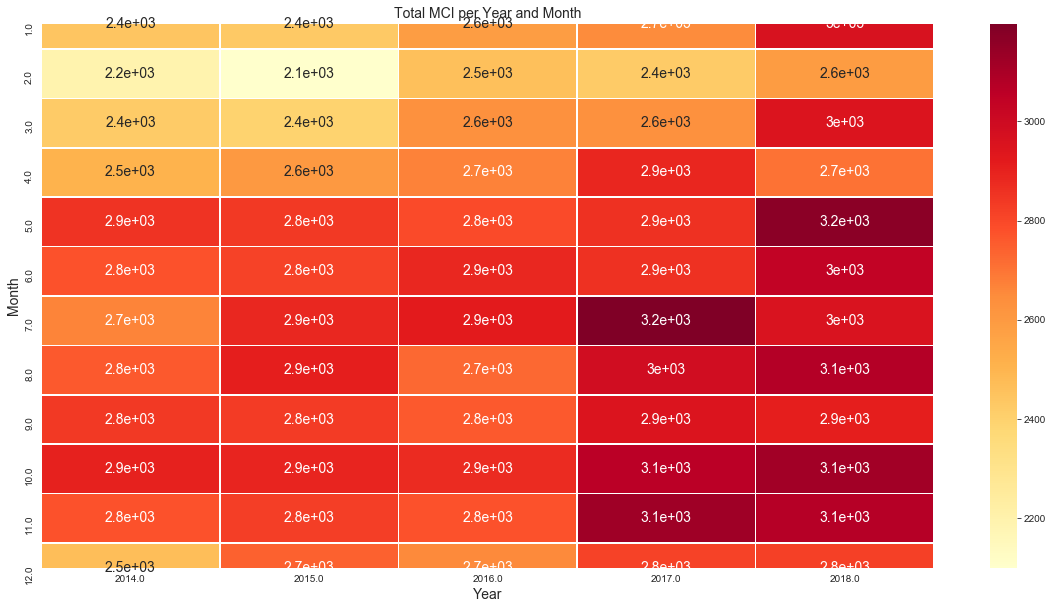

In [61]:
plt.figure(figsize = (20,10))
plt.title('Total MCI per Year and Month',fontsize=14)
sns.heatmap(df_pivot,annot =True, linewidth = 0.6,cmap ='YlOrRd', annot_kws ={'size':14})
plt.xlabel('Year',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

### Total Major Crimes Indicator per year and month bar chart

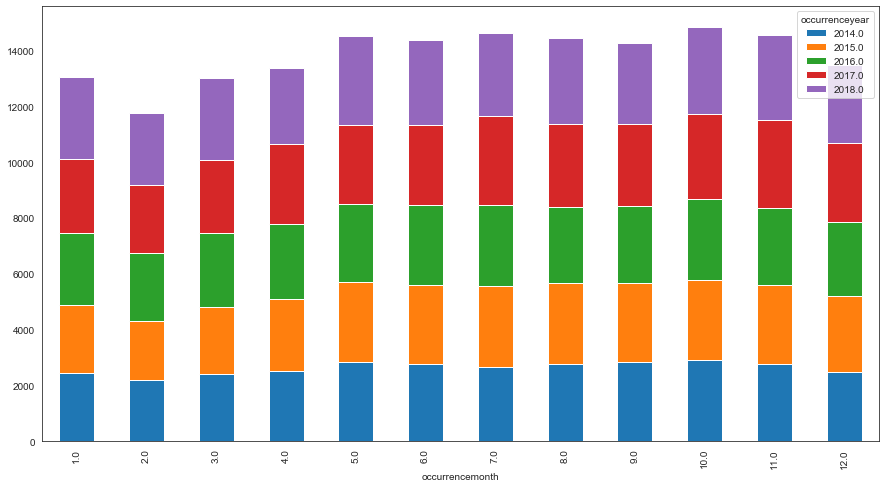

In [62]:
df_pivot.plot(kind='bar',stacked=True,figsize =(15,8))

### Average MCI by district by year

In [64]:
# function to compute group size of columns in dataset
def groupby_size(dataset,columns,name_of_size,ascending = False):
    data_group = dataset.groupby(columns).size().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={0:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values

In [66]:
# function to compute group mean values of columns in dataset
def groupby_mean_value(dataset,columns,column_value,name_of_size,ascending = False):
    data_group = dataset.groupby(columns)[column_value].mean().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={column_value:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values

In [65]:
# function to compute group size of columns in dataset
neighbourdhood3 = groupby_size(dataset=mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0],columns =['Neighbourhood','occurrenceyear'],name_of_size ='Total of MCI',ascending = False)
neighbourdhood3.head()

Neighbourhood  occurrenceyear  Total of MCI
119              Church Yonge Corridor           2018.0          1552
118              Church Yonge Corridor           2017.0          1459
619  Waterfront Communities The Island           2018.0          1266
618  Waterfront Communities The Island           2017.0          1246
117              Church Yonge Corridor           2016.0          1145

#### 2.2 Data acquisition and Libraries used

 ### 3. Exploratory Data Analysis

####  using follium to draw an interactive leaflet map using coordinate data.

In [94]:
import folium # map rendering library

In [69]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_venues['Latitude'], toronto_venues['Longitude'], toronto_venues['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

NameError: name 'latitude' is not defined

In [206]:
kclusters = 6

toronto_part_clustering = toronto_grouped.drop('district_code', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 3, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 4])

In [210]:
df_toronto.rename(columns = {'Neighborhood': 'district_code'}, inplace = True)

In [211]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df_toronto
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped.set_index('district_code'), on='district_code')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

Borough Postalcode                      district_code   Latitude  \
0  Central Toronto        M4N                      Lawrence Park  43.728020   
1  Central Toronto        M4P                   Davisville North  43.712751   
2  Central Toronto        M4R  North Toronto West, Lawrence Park  43.715383   
3  Central Toronto        M4S                         Davisville  43.704324   
4  Central Toronto        M4T        Moore Park, Summerhill East  43.689574   

   Longitude  Cluster Labels  Accessories Store  Airport  Airport Food Court  \
0 -79.388790             4.0                0.0      0.0                 0.0   
1 -79.390197             0.0                0.0      0.0                 0.0   
2 -79.405678             0.0                0.0      0.0                 0.0   
3 -79.388790             0.0                0.0      0.0                 0.0   
4 -79.383160             0.0                0.0      0.0                 0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0       0.0          0.0         0.0                  0.0   
1           0.0       0.0          0.0         0.0                  0.0   
2           0.0       0.0          0.0         0.0                  0.0   
3           0.0       0.0          0.0         0.0                  0.0   
4           0.0       0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0               0.0                 0.0            0.0        0.0         0.0   
1               0.0                 0.0            0.0        0.0         0.0   
2               0.0                 0.0            0.0        0.0         0.0   
3               0.0                 0.0            0.0        0.0         0.0   
4               0.0                 0.0            0.0        0.0         0.0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0         0.0     0.0   0.0  0.0             0.0               0.0   
1         0.0     0.0   0.0  0.0             0.0               0.0   
2         0.0     0.0   0.0  0.0             0.0               0.0   
3         0.0     0.0   0.0  0.0             0.0               0.0   
4         0.0     0.0   0.0  0.0             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0       0.0   
1               0.0                 0.0    0.0              0.0       0.0   
2               0.0                 0.0    0.0              0.0       0.0   
3               0.0                 0.0    0.0              0.0       0.0   
4               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0         0.0                 0.0        0.0     0.0            0.0   
1         0.0                 0.0        0.0     0.0            0.0   
2         0.0                 0.0        0.0     0.0            0.0   
3         0.0                 0.0        0.0     0.0            0.0   
4         0.0                 0.0        0.0     0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot   Brewery  \
0        0.0       0.0                   0.0        0.000000  0.000000   
1        0.0       0.0                   0.0        0.111111  0.000000   
2        0.0       0.0                   0.0        0.000000  0.000000   
3        0.0       0.0                   0.0   

In [214]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['district_code'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## Examing the Clusters:

We have total of 6 clusters such as 0,1,2,3,4,5. Let us examine one after the other.


Cluster 0 contains all the neighborhoods which has . It is shown in red color in the map

In [215]:
#Cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

Borough Postalcode  \
1    Central Toronto        M4P   
2    Central Toronto        M4R   
3    Central Toronto        M4S   
4    Central Toronto        M4T   
5    Central Toronto        M4V   
8    Central Toronto        M5R   
10  Downtown Toronto        M4X   
11  Downtown Toronto        M4Y   
12  Downtown Toronto        M5A   
13  Downtown Toronto        M5B   
14  Downtown Toronto        M5C   
15  Downtown Toronto        M5E   
16  Downtown Toronto        M5G   
17  Downtown Toronto        M5H   
18  Downtown Toronto        M5J   
19  Downtown Toronto        M5K   
20  Downtown Toronto        M5L   
21  Downtown Toronto        M5S   
22  Downtown Toronto        M5T   
23  Downtown Toronto        M5V   
24  Downtown Toronto        M5W   
25  Downtown Toronto        M5X   
26  Downtown Toronto        M6G   
27  Downtown Toronto        M7A   
28      East Toronto        M4E   
29      East Toronto        M4K   
30      East Toronto        M4L   
31      East Toronto        M4M   
32      East Toronto        M7Y   
33         East York        M4B   
34         East York        M4C   
35         East York        M4G   
36         East York        M4H   
38         Etobicoke        M8V   
39         Etobicoke        M8W   
40         Etobicoke        M8X   
42         Etobicoke        M8Z   
43         Etobicoke        M9B   
44         Etobicoke        M9C   
45         Etobicoke        M9P   
46         Etobicoke        M9R   
47         Etobicoke        M9V   
48         Etobicoke        M9W   
49       Mississauga        M7R   
50        North York        M2H   
51        North York        M2J   
52        North York        M2K   
53        North York        M2N   
55        North York        M2R   
57        North York        M3B   
58        North York        M3C   
59        North York        M3H   
60        North York        M3J   
61        North York        M3K   
62        North York        M3L   
63        North York        M3M   
64        North York        M3N   
65        North York        M4A   
66        North York        M5M   
67        North York        M6A   
68        North York        M6B   
70        North York        M9L   
73       Scarborough        M1C   
74       Scarborough        M1E   
75       Scarborough        M1G   
76       Scarborough        M1H   
78       Scarborough        M1K   
79       Scarborough        M1L   
80       Scarborough        M1M   
81       Scarborough        M1N   
82       Scarborough        M1P   
83       Scarborough        M1R   
84       Scarborough        M1S   
85       Scarborough        M1T   
87       Scarborough        M1W   
88      West Toronto        M6H   
89      West Toronto        M6J   
90      West Toronto        M6K   
91      West Toronto        M6P   
92      West Toronto        M6R   
93      West Toronto        M6S   
94              York        M6C   
96              York        M6M   
97              York        M6N   

                                        district_code   Latitude  Longitude  \
1                                    Davisville North  43.712751 -79.390197   
2                   North Toronto West, Lawrence Park  43.715383 -79.405678   
3                                          Davisville  43.704324 -79.388790   
4                         Moore Park, Summerhill East  43.689574 -79.383160   
5   Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -79.400049   
8                 The Annex, North Midtown, Yorkville  43.672710 -79.405678   
10                        St. James Town, Cabbagetown  43.667967 -79.367675   
11                               Church and Wellesley  43.665860 -79.383160   
12                          Regent Park, Harbourfront  43.654260 -79.360636   
13                           Garden District, Ryerson  43.657162 -79.378937   
14                                     St. James Town  43.651494 -79.375418   
15                                        Berczy Park  43.644771 -79.373306   
16        

In [216]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

Borough Postalcode        district_code   Latitude  Longitude  \
77  Scarborough        M1J  Scarborough Village  43.744734 -79.239476   

    Cluster Labels  Accessories Store  Airport  Airport Food Court  \
77             1.0                0.0      0.0                 0.0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
77             0.0              0.0               0.0                  0.0   

    Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
77           0.0       0.0          0.0         0.0                  0.0   

    Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  \
77               0.0                 0.0            0.0        0.0   

    Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
77         0.0         0.0     0.0   0.0  0.0             0.0   

    Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
77               0.0               0.0                 0.0    0.0   

    Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
77              0.0       0.0         0.0                 0.0        0.0   

    Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
77     0.0            0.0        0.0       0.0                   0.0   

    Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
77             0.0      0.0          0.0              0.0       0.0   

    Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
77           0.0            0.0       0.0          0.0       0.0   

    Business Service  Butcher  Cable Car  Café  Cajun / Creole Restaurant  \
77               0.0      0.0        0.0   0.0                        0.0   

    Candy Store  Caribbean Restaurant  Cheese Shop  Chinese Restaurant  \
77          0.0                   0.0          0.0                 0.0   

    Chocolate Shop  Church  Climbing Gym  Clothing Store  Cocktail Bar  \
77             0.0     0.0           0.0             0.0           0.0   

    Coffee Shop  College Arts Building  College Auditorium  College Cafeteria  \
77          0.0                    0.0                 0.0                0.0   

    College Gym  College Rec Center  College Stadium  Colombian Restaurant  \
77          0.0                 0.0              0.0                   0.0   

    Comfort Food Restaurant  Comic Shop  Concert Hall  \
77                      0.0         0.0           0.0   

    Construction & Landscaping  Convenience Store  Convention Center  \
77                         0.0                0.0                0.0   

    Cosmetics Shop  Coworking Space  Creperie  Cuban Restaurant  Cupcake Shop  \
77             0.0              0.0       0.0               0.0           0.0   

    Curling Ice  Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
77          0.0           0.0            0.0               0.0           0.0   

    Dim Sum Restaurant  Diner  Discount Store  Distribution Center  Dog Run  \
77                 0.0    0.0             0.0                  0.0      0.0   

    Doner Restaurant  Donut Shop  Drugstore  Dumpling Restaurant  \
77               0.0         0.0        0.0                  0.0   

    Eastern European Restaurant  Electronics Store  Ethiopian Restaurant  \
77                          0.0                0.0                   0.0   

    Event Space  Falafel Restaurant  Farm  Farmers Market  \
77          0.0                 0.0   0.0             0.0   

    Fast Food Restaurant  Field  Filipino Restaurant  Fish & Chips Shop  \
77                   0.0    0.0                  0.0                0.0   

    Fish Market  Flea Market  Flower Shop  Food  Food & Drink Shop  \
77          0.0          0.0          0.0   0.0                0.0   

    Food Court  Food Truck  Fountain  French Restaurant  Fried Chicken Joint  \
77         0.0         0.0       0.0                0.0                  0.0   

    Frozen Yogurt Shop  Fruit & Vegetab

In [217]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

Borough Postalcode     district_code   Latitude  Longitude  \
71  North York        M9M  Humberlea, Emery  43.724766 -79.532242   

    Cluster Labels  Accessories Store  Airport  Airport Food Court  \
71             2.0                0.0      0.0                 0.0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
71             0.0              0.0               0.0                  0.0   

    Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
71           0.0       0.0          0.0         0.0                  0.0   

    Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  \
71               0.0                 0.0            0.0        0.0   

    Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
71         0.0         0.0     0.0   0.0  0.0             0.5   

    Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
71               0.0               0.0                 0.0    0.0   

    Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
71              0.0       0.0         0.0                 0.0        0.0   

    Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
71     0.0            0.0        0.0       0.0                   0.0   

    Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
71             0.0      0.0          0.0              0.0       0.0   

    Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
71           0.0            0.0       0.0          0.0       0.0   

    Business Service  Butcher  Cable Car  Café  Cajun / Creole Restaurant  \
71               0.0      0.0        0.0   0.0                        0.0   

    Candy Store  Caribbean Restaurant  Cheese Shop  Chinese Restaurant  \
71          0.0                   0.0          0.0                 0.0   

    Chocolate Shop  Church  Climbing Gym  Clothing Store  Cocktail Bar  \
71             0.0     0.0           0.0             0.0           0.0   

    Coffee Shop  College Arts Building  College Auditorium  College Cafeteria  \
71          0.0                    0.0                 0.0                0.0   

    College Gym  College Rec Center  College Stadium  Colombian Restaurant  \
71          0.0                 0.0              0.0                   0.0   

    Comfort Food Restaurant  Comic Shop  Concert Hall  \
71                      0.0         0.0           0.0   

    Construction & Landscaping  Convenience Store  Convention Center  \
71                         0.0                0.0                0.0   

    Cosmetics Shop  Coworking Space  Creperie  Cuban Restaurant  Cupcake Shop  \
71             0.0              0.0       0.0               0.0           0.0   

    Curling Ice  Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
71          0.0           0.0            0.0               0.0           0.0   

    Dim Sum Restaurant  Diner  Discount Store  Distribution Center  Dog Run  \
71                 0.0    0.0             0.0                  0.0      0.0   

    Doner Restaurant  Donut Shop  Drugstore  Dumpling Restaurant  \
71               0.0         0.0        0.0                  0.0   

    Eastern European Restaurant  Electronics Store  Ethiopian Restaurant  \
71                          0.0                0.0                   0.0   

    Event Space  Falafel Restaurant  Farm  Farmers Market  \
71          0.0                 0.0   0.0             0.0   

    Fast Food Restaurant  Field  Filipino Restaurant  Fish & Chips Shop  \
71                   0.0    0.0                  0.0                0.0   

    Fish Market  Flea Market  Flower Shop  Food  Food & Drink Shop  \
71          0.0          0.0          0.0   0.0                0.0   

    Food Court  Food Truck  Fountain  French Restaurant  Fried Chicken Joint  \
71         0.0         0.0       0.0                0.0                  0.0   

    Frozen Yogurt Shop  Fruit & Vegetable Stor

In [218]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

Borough Postalcode   district_code   Latitude  Longitude  \
72  Scarborough        M1B  Malvern, Rouge  43.806686 -79.194353   

    Cluster Labels  Accessories Store  Airport  Airport Food Court  \
72             3.0                0.0      0.0                 0.0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
72             0.0              0.0               0.0                  0.0   

    Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
72           0.0       0.0          0.0         0.0                  0.0   

    Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  \
72               0.0                 0.0            0.0        0.0   

    Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
72         0.0         0.0     0.0   0.0  0.0             0.0   

    Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
72               0.0               0.0                 0.0    0.0   

    Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
72              0.0       0.0         0.0                 0.0        0.0   

    Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
72     0.0            0.0        0.0       0.0                   0.0   

    Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
72             0.0      0.0          0.0              0.0       0.0   

    Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
72           0.0            0.0       0.0          0.0       0.0   

    Business Service  Butcher  Cable Car  Café  Cajun / Creole Restaurant  \
72               0.0      0.0        0.0   0.0                        0.0   

    Candy Store  Caribbean Restaurant  Cheese Shop  Chinese Restaurant  \
72          0.0                   0.0          0.0                 0.0   

    Chocolate Shop  Church  Climbing Gym  Clothing Store  Cocktail Bar  \
72             0.0     0.0           0.0             0.0           0.0   

    Coffee Shop  College Arts Building  College Auditorium  College Cafeteria  \
72          0.0                    0.0                 0.0                0.0   

    College Gym  College Rec Center  College Stadium  Colombian Restaurant  \
72          0.0                 0.0              0.0                   0.0   

    Comfort Food Restaurant  Comic Shop  Concert Hall  \
72                      0.0         0.0           0.0   

    Construction & Landscaping  Convenience Store  Convention Center  \
72                         0.0                0.0                0.0   

    Cosmetics Shop  Coworking Space  Creperie  Cuban Restaurant  Cupcake Shop  \
72             0.0              0.0       0.0               0.0           0.0   

    Curling Ice  Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
72          0.0           0.0            0.0               0.0           0.0   

    Dim Sum Restaurant  Diner  Discount Store  Distribution Center  Dog Run  \
72                 0.0    0.0             0.0                  0.0      0.0   

    Doner Restaurant  Donut Shop  Drugstore  Dumpling Restaurant  \
72               0.0         0.0        0.0                  0.0   

    Eastern European Restaurant  Electronics Store  Ethiopian Restaurant  \
72                          0.0                0.0                   0.0   

    Event Space  Falafel Restaurant  Farm  Farmers Market  \
72          0.0                 0.0   0.0             0.0   

    Fast Food Restaurant  Field  Filipino Restaurant  Fish & Chips Shop  \
72                   1.0    0.0                  0.0                0.0   

    Fish Market  Flea Market  Flower Shop  Food  Food & Drink Shop  \
72          0.0          0.0          0.0   0.0                0.0   

    Food Court  Food Truck  Fountain  French Restaurant  Fried Chicken Joint  \
72         0.0         0.0       0.0                0.0                  0.0   

    Frozen Yogurt Shop  Fruit & Vegetable Store  

In [219]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

Borough Postalcode  \
0    Central Toronto        M4N   
7    Central Toronto        M5P   
9   Downtown Toronto        M4W   
37         East York        M4J   
41         Etobicoke        M8Y   
54        North York        M2P   
56        North York        M3A   
69        North York        M6L   
86       Scarborough        M1V   
95              York        M6E   
98              York        M9N   

                                        district_code   Latitude  Longitude  \
0                                       Lawrence Park  43.728020 -79.388790   
7     Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307   
9                                            Rosedale  43.679563 -79.377529   
37      East Toronto, Broadview North (Old East York)  43.685347 -79.338106   
41  Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509   
54                                    York Mills West  43.752758 -79.400049   
56                                          Parkwoods  43.753259 -79.329656   
69           North Park, Maple Leaf Park, Upwood Park  43.713756 -79.490074   
86  Milliken, Agincourt North, Steeles East, L'Amo...  43.815252 -79.284577   
95                                Caledonia-Fairbanks  43.689026 -79.453512   
98                                             Weston  43.706876 -79.518188   

    Cluster Labels  Accessories Store  Airport  Airport Food Court  \
0              4.0                0.0      0.0                 0.0   
7              4.0                0.0      0.0                 0.0   
9              4.0                0.0      0.0                 0.0   
37             4.0                0.0      0.0                 0.0   
41             4.0                0.0      0.0                 0.0   
54             4.0                0.0      0.0                 0.0   
56             4.0                0.0      0.0                 0.0   
69             4.0                0.0      0.0                 0.0   
86             4.0                0.0      0.0                 0.0   
95             4.0                0.0      0.0                 0.0   
98             4.0                0.0      0.0                 0.0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0              0.0              0.0               0.0                  0.0   
7              0.0              0.0               0.0                  0.0   
9              0.0              0.0               0.0                  0.0   
37             0.0              0.0               0.0                  0.0   
41             0.0              0.0               0.0                  0.0   
54             0.0              0.0               0.0                  0.0   
56             0.0              0.0               0.0                  0.0   
69             0.0              0.0               0.0                  0.0   
86             0.0              0.0               0.0                  0.0   
95             0.0              0.0               0.0                  0.0   
98             0.0              0.0               0.0                  0.0   

    Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0            0.0       0.0          0.0         0.0                  0.0   
7            0.0       0.0          0.0         0.0                  0.0   
9            0.0       0.0          0.0         0.0                  0.0   
37           0.0       0.0          0.0         0.0                  0.0   
41           0.0       0.0          0.0         0.0                  0.0   
54           0.0       0.0          0.0         0.0                  0.0   
56           0.0       0.0          0.0         0.0                  0.0   
69           0.0       0.0          0.0         0.0                  0.0   
86           0.0       0.0          0.0         0.0                  0.0   
95           0.0       0.0          0.0         0.0                  0.0   
98           0.0       0.0   

In [220]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

Borough Postalcode district_code   Latitude  Longitude  \
6  Central Toronto        M5N      Roselawn  43.711695 -79.416936   

   Cluster Labels  Accessories Store  Airport  Airport Food Court  \
6             5.0                0.0      0.0                 0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
6             0.0              0.0               0.0                  0.0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
6           0.0       0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
6               0.0                 0.0            0.0        0.0         0.0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
6         0.0     0.0   0.0  0.0             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
6               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
6         0.0                 0.0        0.0     0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
6        0.0       0.0                   0.0             0.0      0.0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
6          0.0              0.0       0.0           0.0            0.0   

   Bus Line  Bus Station  Bus Stop  Business Service  Butcher  Cable Car  \
6       0.0          0.0       0.0               0.0      0.0        0.0   

   Café  Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  \
6   0.0                        0.0          0.0                   0.0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Church  Climbing Gym  \
6          0.0                 0.0             0.0     0.0           0.0   

   Clothing Store  Cocktail Bar  Coffee Shop  College Arts Building  \
6             0.0           0.0          0.0                    0.0   

   College Auditorium  College Cafeteria  College Gym  College Rec Center  \
6                 0.0                0.0          0.0                 0.0   

   College Stadium  Colombian Restaurant  Comfort Food Restaurant  Comic Shop  \
6              0.0                   0.0                      0.0         0.0   

   Concert Hall  Construction & Landscaping  Convenience Store  \
6           0.0                         0.0                0.0   

   Convention Center  Cosmetics Shop  Coworking Space  Creperie  \
6                0.0             0.0              0.0       0.0   

   Cuban Restaurant  Cupcake Shop  Curling Ice  Dance Studio  Deli / Bodega  \
6               0.0           0.0          0.0           0.0            0.0   

   Department Store  Dessert Shop  Dim Sum Restaurant  Diner  Discount Store  \
6               0.0           0.0                 0.0    0.0             0.0   

   Distribution Center  Dog Run  Doner Restaurant  Donut Shop  Drugstore  \
6                  0.0      0.0               0.0         0.0        0.0   

   Dumpling Restaurant  Eastern European Restaurant  Electronics Store  \
6                  0.0                          0.0                0.0   

   Ethiopian Restaurant  Event Space  Falafel Restaurant  Farm  \
6                   0.0          0.0                 0.0   0.0   

   Farmers Market  Fast Food Restaurant  Field  Filipino Restaurant  \
6             0.0                   0.0    0.0                  0.0   

   Fish & Chips Shop  Fish Market  Flea Market  Flower Shop  Food  \
6                0.0          0.0          0.0          0.0   0.0   

   Food & Drink Shop  Food Court  Food Truck  Fountain  French Restaurant  \
6                0.0         0.0         0.0       0.0                0.0   

   Fried Chicken Joint  Frozen Yogurt Shop  Fruit & Vegetable Store  \
6                  0.0                 0.0                      0.0   

   Furniture